In [5]:
import requests
import pandas as pd

AUTHORIZATION_KEY = "eyJraWQiOiJYZ2VmbVZaalA0N2ttNzM3VDlVOTIwTnl3bkRNTFYyMW5WN3cxREFHSFwvcz0iLCJhbGciOiJSUzI1NiJ9.eyJzdWIiOiIzODVkZDhmYi1lMDJkLTQ2YjgtOTc5Yi1hM2UwZjFiODY3MjYiLCJjb2duaXRvOmdyb3VwcyI6WyJzcG9pbGVycyJdLCJpc3MiOiJodHRwczpcL1wvY29nbml0by1pZHAudXMtZWFzdC0yLmFtYXpvbmF3cy5jb21cL3VzLWVhc3QtMl9acVJCWG1nZWEiLCJjbGllbnRfaWQiOiI4YjhwbTI4YTZrMjVwZGxnYnA2YzhlcTRlIiwib3JpZ2luX2p0aSI6IjJlZjljMmI0LWJlZjUtNGI4Ny04NDNkLWQ3YTM2ZjEzYjdkYiIsImV2ZW50X2lkIjoiMjRmOWE3MDQtOGU1MC00ZWRmLWFjZDItNzQxZDc2M2E3OTY0IiwidG9rZW5fdXNlIjoiYWNjZXNzIiwic2NvcGUiOiJhd3MuY29nbml0by5zaWduaW4udXNlci5hZG1pbiIsImF1dGhfdGltZSI6MTczMzc1ODUxNywiZXhwIjoxNzM2Mjc5MDc0LCJpYXQiOjE3MzYyNzU0NzQsImp0aSI6ImE1YjRlNDQ0LTQ0MjctNDE5Ny1iMTc5LTgxMTRiMTA0N2QwNSIsInVzZXJuYW1lIjoiMzg1ZGQ4ZmItZTAyZC00NmI4LTk3OWItYTNlMGYxYjg2NzI2In0.VuZt1btGm7OTt71zvffDfkk3_QdzGK7vmLiAi1L8YN4f-IQONadsCjHfehx3QB3JzLpm3IE6UrsC4kKsjOCjOzKfbKYcEtjzn_3MvBNsj8TanPsP9t65TN9esq8gOiMXwyy1N-jgItf9-oOJ81sVDkOh30y8RMVjsFoWRn0Zkj4aiUNd9MBZR0sZLYwD7BL8PbBwG5ikNj1ET8dJPZN2VhDwQNtG5Fwgu0wzJcK4Put-eXcYPFHRY6E3Kf-VKgk1ztraMywdtTI-0Pu6xi0SHfH335pfriqKbZ6x8mSvFTBmQu00yupfhvmFttIgLaCoGEuHLVn0p1ei1BESZ2SYqQ"
AWS_URL = "https://umiv3r4ar5azlhtlitvy7jozqu.appsync-api.us-east-2.amazonaws.com/graphql"

def fetch_fabrary_tournament_decks():
    url = AWS_URL
    headers = {
        "Content-Type": "application/json",
        "Accept": "application/json",
        "Authorization": AUTHORIZATION_KEY
    }

    payload={
        "query": "query getTournamentDecks {\n  getTournamentDecks {\n    ...Deck\n  }\n}\n\nfragment Deck on Deck {\n  deckId\n  userId\n  author {\n    userId\n    patreon {\n      status\n    }\n    patreonPreferences {\n      nameFoiling\n      profilePicture\n    }\n    publicProfile {\n      isPrivate\n      nickname\n    }\n  }\n  format\n  hasNotes\n  hero {\n    name\n    cardIdentifier\n    defaultImage\n  }\n  heroIdentifier\n  isUsersFavorite {\n    userId\n    deckId\n    favoritedAt\n  }\n  matchupsCount\n  name\n  plays\n  proxyAuthor\n  tags\n  visibility\n  wins\n  youtube {\n    author\n    id\n    title\n  }\n  createdAt\n  updatedAt\n}\n",
        "variables": {}
    }
    
    response = requests.post(url, headers=headers, json=payload)
    decks = response.json()

    return decks

def fetch_fabrary_deck(deckId):
    url = AWS_URL
    headers = {
        "Content-Type": "application/json",
        "Accept": "application/json",
        "Authorization": AUTHORIZATION_KEY
    }    


    payload={
    "query": "query getDeck($deckId: ID!) {\n  getDeck(deckId: $deckId) {\n    deckId\n    author {\n      userId\n      patreon {\n        status\n      }\n      patreonPreferences {\n        nameFoiling\n        profilePicture\n      }\n      publicProfile {\n        isPrivate\n        nickname\n      }\n    }\n    deckCards {\n      cardIdentifier\n      deckId\n      card {\n        ...DatabaseCard\n      }\n      blocked\n      pitched\n      played\n      matchupQuantities {\n        matchupId\n        quantity\n        sideboardQuantity\n      }\n      quantity\n      sideboardQuantity\n      maybeQuantity\n    }\n    format\n    hero {\n      ...DatabaseCard\n      heroInformation {\n        livingLegendStart\n      }\n      intellect\n    }\n    heroIdentifier\n    isUsersFavorite {\n      userId\n      deckId\n      favoritedAt\n    }\n    name\n    notes\n    originalDeckId\n    originalDeck {\n      name\n      author {\n        userId\n        publicProfile {\n          isPrivate\n          nickname\n        }\n      }\n    }\n    proxyAuthor\n    tags\n    tournament\n    matchups {\n      matchupId\n      goFirst\n      name\n      notes\n      preferredTurnOrder\n    }\n    plays\n    preferredTurnOrder\n    userId\n    versions {\n      deckId\n      deckVersionId\n      deckCards {\n        card {\n          ...FullCard\n        }\n        cardIdentifier\n        quantity\n        sideboardQuantity\n        maybeQuantity\n      }\n      matchups {\n        matchupId\n      }\n      notes\n      version\n      youtube {\n        id\n      }\n      createdAt\n    }\n    visibility\n    wins\n    youtube {\n      author\n      id\n      title\n    }\n    createdAt\n    updatedAt\n  }\n}\n\nfragment DatabaseCard on Card {\n  ...CardCollection\n  ...CardPricing\n  ...FullCard\n}\n\nfragment CardCollection on Card {\n  collection {\n    have\n  }\n}\n\nfragment CardPricing on Card {\n  printingsWithPrices {\n    ...PrintingWithPrices\n  }\n}\n\nfragment PrintingWithPrices on PrintingWithPrices {\n  artists\n  edition\n  foiling\n  identifier\n  image\n  isExpansionSlot\n  print\n  set\n  treatment\n  flukeAndBox {\n    ...PricesFragment\n  }\n  minMax {\n    ...PricesFragment\n  }\n  tcgplayer {\n    ...PricesFragment\n  }\n}\n\nfragment PricesFragment on Pricing {\n  name\n  prices {\n    currency\n    price\n  }\n  productId\n  quantity\n  url\n}\n\nfragment FullCard on Card {\n  ...CardMatchingPrinting\n  ...FullOneSidedCard\n  oppositeSideCard {\n    ...FullOneSidedCard\n  }\n}\n\nfragment CardMatchingPrinting on Card {\n  matchingPrintings {\n    artists\n    edition\n    foiling\n    identifier\n    image\n    isExpansionSlot\n    oppositeImage\n    print\n    set\n    treatment\n  }\n}\n\nfragment FullOneSidedCard on Card {\n  arcane\n  artists\n  bannedFormats\n  cardIdentifier\n  classes\n  cost\n  defaultImage\n  defense\n  functionalText\n  fusions\n  hero\n  isActive\n  isCardBack\n  keywords\n  legalFormats\n  legalHeroes\n  meta\n  metatypes\n  name\n  oppositeSideCardIdentifier\n  oppositeSideCardIdentifiers\n  rarity\n  restrictedFormats\n  specialArcane\n  specialCost\n  specialDefense\n  specialImage\n  specializations\n  specialPower\n  subtypes\n  types\n  pitch\n  power\n  rarities\n  sets\n  setIdentifiers\n  talents\n  traits\n  typeText\n  young\n  ...CardPrinting\n}\n\nfragment CardPrinting on Card {\n  printings {\n    artists\n    edition\n    foiling\n    identifier\n    image\n    isExpansionSlot\n    oppositeImage\n    print\n    set\n    treatment\n  }\n}\n",
    "variables": {"deckId": deckId}
    }

    response = requests.post(url, headers=headers, json=payload)
    deck = response.json()
    return deck

In [6]:
tournament_decks = fetch_fabrary_tournament_decks()
deck_test = fetch_fabrary_deck("01JFGKRMJRC44QBPR2QTH2A7PQ")

In [7]:
tournament_decks_df = pd.DataFrame(tournament_decks['data']['getTournamentDecks'])
tournament_decks_df['createdAt'] = pd.to_datetime(tournament_decks_df['createdAt'])
tournament_decks_df.query('createdAt >= "2024-01-01"')
tournament_decks_df

,deckId,userId,author,format,hasNotes,hero,heroIdentifier,isUsersFavorite,matchupsCount,name,plays,proxyAuthor,tags,visibility,wins,youtube,createdAt,updatedAt
0,01JDK8VHTXBWW7TA5YHRT7D655,59d0c304-a470-4272-9f75-8365c3909430,{'userId': '59d0c304-a470-4272-9f75-8365c39094...,Classic Constructed,None,"{'name': 'Ira, Scarlet Revenger', 'cardIdentif...",ira-scarlet-revenger,None,NaN,Battle Hardened: Stockholm 5th 🇸🇪,406.0,Michał Biereg,None,Public,174.0,None,2024-11-26T03:39:47.933Z,2024-11-26T03:39:48.060Z
1,01J3ZRYEATQ75FFZ06MCWKP7BE,59d0c304-a470-4272-9f75-8365c3909430,{'userId': '59d0c304-a470-4272-9f75-8365c39094...,Classic Constructed (Living Legend),False,"{'name': 'Bravo, Star of the Show', 'cardIdent...",bravo-star-of-the-show,None,NaN,Battle Hardened: Amsterdam 5th 🇳🇱,355.0,"Thanthawat ""Vespa"" Chujitngamsuwong",[],Public,190.0,None,2024-07-29T17:34:54.810Z,2024-07-29T17:37:23.815Z
2,01HCVA61TR2THX4J0SP47GP38Q,59d0c304-a470-4272-9f75-8365c3909430,{'userId': '59d0c304-a470-4272-9f75-8365c39094...,Classic Constructed,None,"{'name': 'Lexi, Livewire', 'cardIdentifier': '...",lexi-livewire,None,NaN,Battle Hardened: Toulouse 5th 🇫🇷,NaN,Clément Loubiere,None,Public,NaN,None,2023-10-16T03:58:55.832Z,2023-10-16T03:58:55.933Z
3,01H5Q9G3WWQ0D9D95DWVJ2F4F5,59d0c304-a470-4272-9f75-8365c3909430,{'userId': '59d0c304-a470-4272-9f75-8365c39094...,Classic Constructed,None,"{'name': 'Uzuri, Switchblade', 'cardIdentifier...",uzuri-switchblade,None,NaN,Battle Hardened: Cincinnati 5th,330.0,Sam Dando,None,Public,128.0,None,2023-07-19T14:40:06.556Z,2023-07-19T14:40:06.682Z
4,01GR2BEVFYWBS4QACPZS46JCK3,59d0c304-a470-4272-9f75-8365c3909430,{'userId': '59d0c304-a470-4272-9f75-8365c39094...,Classic Constructed,False,"{'name': 'Oldhim, Grandfather of Eternity', 'c...",oldhim-grandfather-of-eternity,None,NaN,Battle Hardened Belgium 5th,NaN,Nuno Amaral,[],Public,NaN,None,2023-01-30T22:06:15.550Z,2023-01-30T22:06:26.063Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,01J0025264PZV5PFZ5VJAPCDPS,59d0c304-a470-4272-9f75-8365c3909430,{'userId': '59d0c304-a470-4272-9f75-8365c39094...,Classic Constructed,None,"{'name': 'Enigma, Ledger of Ancestry', 'cardId...",enigma-ledger-of-ancestry,None,NaN,Battle Hardened: Singapore 5th 🇸🇬,140.0,Kai Yang Yuen,None,Public,49.0,None,2024-06-10T03:13:01.636Z,2024-06-10T03:13:01.746Z
936,01JDE9Y9VE0CFR9C01QJ86VR57,59d0c304-a470-4272-9f75-8365c3909430,{'userId': '59d0c304-a470-4272-9f75-8365c39094...,Blitz,None,"{'name': 'Blaze, Firemind', 'cardIdentifier': ...",blaze-firemind,None,NaN,Battle Hardened: Florence 1st 🇮🇹,2.0,Erika Forslöf,None,Public,1.0,None,2024-11-24T05:22:34.477Z,2024-11-24T05:22:34.595Z
937,01GZCVTRH6D0GMZTAZEK127NJ8,59d0c304-a470-4272-9f75-8365c3909430,{'userId': '59d0c304-a470-4272-9f75-8365c39094...,Classic Constructed,False,"{'name': 'Dromai, Ash Artist', 'cardIdentifier...",dromai-ash-artist,None,3.0,Pro Tour: Baltimore 2nd,911.0,Mara Faris,[],Public,458.0,None,2023-05-01T23:54:40.038Z,2023-05-01T23:55:05.217Z
938,01JDK8YX3YBJXAM02RBYMXQD6T,59d0c304-a470-4272-9f75-8365c3909430,{'userId': '59d0c304-a470-4272-9f75-8365c39094...,Classic Constructed,False,"{'name': 'Zen, Tamer of Purpose', 'cardIdentif...",zen-tamer-of-purpose,None,NaN,Battle Hardened: Stockholm 1st 🇸🇪,50.0,Jacob Trossing,[],Public,27.0,None,2024-11-26T03:41:37.790Z,2024-11-26T03:41:44.770Z


In [8]:
def _min_price(list_of_prices):
    usd_prices = [
        price_entry["price"]
        for item in list_of_prices
        for source in ["flukeAndBox", "minMax", "tcgplayer"]
        if item.get(source) and item[source].get("prices")
        for price_entry in item[source]["prices"]
        if price_entry.get("currency") == "USD"
    ]
    return min(usd_prices) if usd_prices else None


def filter_deck_df(df):
    df['cheapestPrice'] = df['card.printingsWithPrices'].apply(lambda x: _min_price(x))
    return df[['cardIdentifier', 'deckId', 'quantity', 'cheapestPrice']]

meta_info = ['createdAt', 'deckId', 'format', 'heroIdentifier', 'name', 'notes', 'originalDeck', 'originalDeckId', 'plays', 'proxyAuthor', 'tournament', 'updatedAt', 'userId', 'visibility', 'wins']
deck_test_df = pd.json_normalize(deck_test['data']['getDeck'], record_path=['deckCards'], meta=meta_info, meta_prefix='deck.')
deck_test_df['cheapestPrice'] = deck_test_df['card.printingsWithPrices'].apply(lambda x: _min_price(x))
deck_test_df['totalCardPrice'] = deck_test_df['cheapestPrice'] * deck_test_df['quantity']
deck_test_df['totalCardPrice'].sum()

np.float64(584.65)

In [21]:
from tqdm import tqdm

comp_decks = pd.DataFrame(columns=['cardIdentifier', 'deckId', 'quantity', 'cheapestPrice'])
for record in tqdm(tournament_decks_df.iterrows()):
    deck_json = fetch_fabrary_deck(record[1]['deckId'])
    
    meta_info = ['createdAt', 'deckId', 'format', 'heroIdentifier', 'name', 'notes', 'originalDeck', 'originalDeckId', 'plays', 'proxyAuthor', 'tournament', 'updatedAt', 'userId', 'visibility', 'wins']
    deck = pd.json_normalize(deck_json['data']['getDeck'], record_path=['deckCards'], meta=meta_info, meta_prefix='deck.')
    deck['cheapestPrice'] = deck['card.printingsWithPrices'].apply(lambda x: _min_price(x))
    comp_decks = pd.concat([comp_decks, deck[['deck.createdAt', 'deckId', 'deck.heroIdentifier', 'deck.format', 'deck.tournament', 'deck.proxyAuthor', 'cardIdentifier', 'quantity', 'cheapestPrice']]])
    

0it [00:00, ?it/s]C:\Users\g_bruno\AppData\Local\Temp\ipykernel_24388\2351486978.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comp_decks = pd.concat([comp_decks, deck[['deck.createdAt', 'deckId', 'deck.heroIdentifier', 'deck.format', 'deck.tournament', 'deck.proxyAuthor', 'cardIdentifier', 'quantity', 'cheapestPrice']]])
940it [11:30,  1.36it/s]


In [85]:
comp_decks.to_pickle('comp_decks.pkl')

# Analysis with pickled df

In [2]:
import pandas as pd

comp_decks = pd.read_pickle('comp_decks.pkl')

In [3]:
import networkx as nx

# Group by deckId
decks = comp_decks.groupby('deckId').apply(lambda x: x.set_index('cardIdentifier')['quantity'].to_dict())
deck_prices = comp_decks.groupby('deckId').apply(lambda x: x.set_index('cardIdentifier')['cheapestPrice'].to_dict())

# Initialize graph
G = nx.DiGraph()

# Calculate "distance" between decks
for deck_a, cards_a in decks.items():
    for deck_b, cards_b in decks.items():
        if deck_a != deck_b:
            cost = 0
            for card, qty_b in cards_b.items():
                qty_a = cards_a.get(card, 0)  # Quantity in deck A (default to 0)
                if qty_b > qty_a:
                    missing_qty = qty_b - qty_a
                    cost += missing_qty * deck_prices[deck_b][card]
            # Add directed edge with cost
            G.add_edge(deck_a, deck_b, weight=cost)

C:\Users\g_bruno\AppData\Local\Temp\ipykernel_32456\2179667145.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  decks = comp_decks.groupby('deckId').apply(lambda x: x.set_index('cardIdentifier')['quantity'].to_dict())
C:\Users\g_bruno\AppData\Local\Temp\ipykernel_32456\2179667145.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  deck_prices = comp_decks.groupby('deckId').apply(lambda x: x.set_index('ca

In [4]:
edges_df = pd.DataFrame([
    {'source': u, 'target': v, 'cost': d['weight']}
    for u, v, d in G.edges(data=True)
])
avg_price_df = edges_df.groupby('source')['cost'].mean()
print(avg_price_df.mean())

422.9525708131879


In [5]:
comp_decks = comp_decks.rename(columns={'deck.format': 'deck_format'})
comp_decks_filtered = comp_decks.query('deck_format == "Classic Constructed"')
pivot = comp_decks_filtered.pivot_table(index=['deckId', 'deck.heroIdentifier', 'deck_format'], columns='cardIdentifier', values='quantity', fill_value=0)
edges_df

C:\Users\g_bruno\AppData\Local\Temp\ipykernel_32456\52253335.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = comp_decks_filtered.pivot_table(index=['deckId', 'deck.heroIdentifier', 'deck_format'], columns='cardIdentifier', values='quantity', fill_value=0)


,source,target,cost
0,01G76G1DP5VVB050BT3YV9TQ7K,01G76GVEV93K0AN4JDBAM4FEJB,383.44
1,01G76G1DP5VVB050BT3YV9TQ7K,01G76JEE5CACHMEGGK1HNBZR47,156.95
2,01G76G1DP5VVB050BT3YV9TQ7K,01G76JQMD9HVR5PECZ5DVSJYRR,253.66
3,01G76G1DP5VVB050BT3YV9TQ7K,01G76K8WSRKKP1TH52E46X6V6V,184.31
4,01G76G1DP5VVB050BT3YV9TQ7K,01G76KM3F0GM89AY0CMY2EN7QX,408.99
...,...,...,...
882655,01JFGKRMJRC44QBPR2QTH2A7PQ,01JFGKP64D0560TRE9BNMHAB68,71.72
882656,01JFGKRMJRC44QBPR2QTH2A7PQ,01JFGKPPJHV9B34DN76JSHPACK,525.72
882657,01JFGKRMJRC44QBPR2QTH2A7PQ,01JFGKQ61H9ABCZ3577DPNQ7W5,71.80
882658,01JFGKRMJRC44QBPR2QTH2A7PQ,01JFGKQPSWQYWJ11M6XX591AN4,696.69


c:\Python Projects\myfabpath\.venv\lib\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


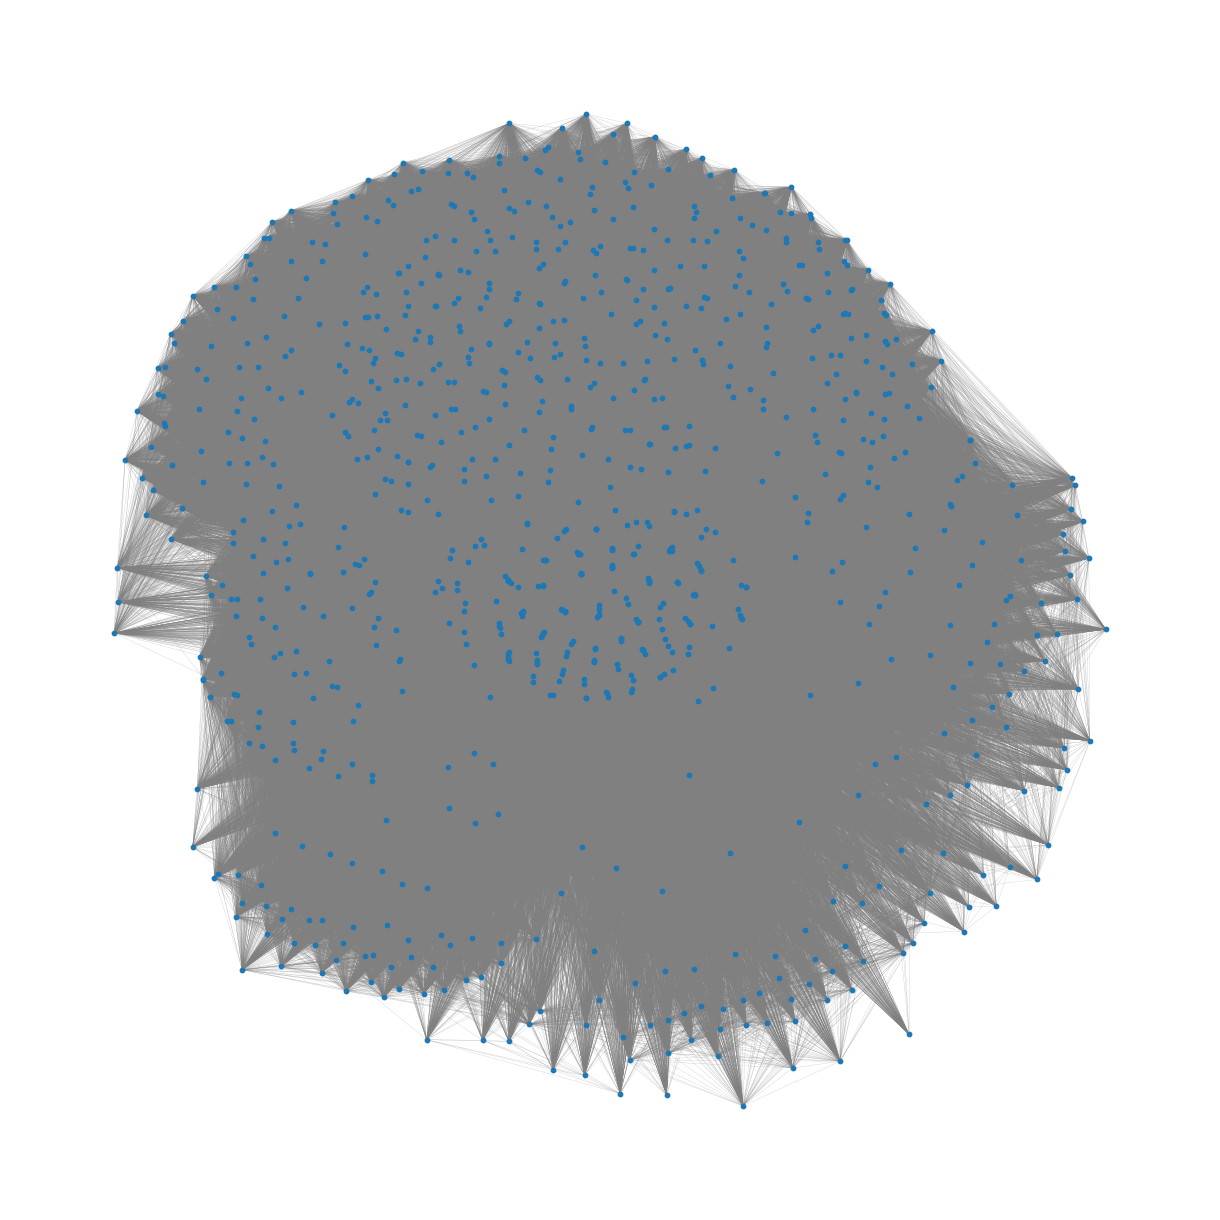

In [6]:
import matplotlib.pyplot as plt

threshold = 350
# Filter edges by weight or threshold
filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] < threshold]

# Filter graph
H = nx.Graph()
H.add_nodes_from(G.nodes())
H.add_edges_from(filtered_edges)

# Spring layout (positions of nodes)
pos = nx.spring_layout(H, k=0.15, iterations=200)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(
    H,
    pos,
    node_size=10,
    edge_color="gray",
    width=0.1,
    cmap=plt.cm.viridis
)
plt.show()

In [83]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA

# Step 2: Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot)

# Step 3: Apply K-Means Clustering
k = 20  # Number of clusters (choose an appropriate value)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
pivot['cluster'] = clusters
print("Clustered Data:\n", pivot)

# Step 4: Dimensionality Reduction for Visualization (optional)
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)


Clustered Data:
 cardIdentifier                                                              10000-year-reunion-red  \
deckId                     deck.heroIdentifier         deck_format                                   
01G76GVEV93K0AN4JDBAM4FEJB dromai-ash-artist           Classic Constructed                     0.0   
01G76JEE5CACHMEGGK1HNBZR47 rhinar-reckless-rampage     Classic Constructed                     0.0   
01G76JQMD9HVR5PECZ5DVSJYRR prism-sculptor-of-arc-light Classic Constructed                     0.0   
01G76K8WSRKKP1TH52E46X6V6V dromai-ash-artist           Classic Constructed                     0.0   
01G76KM3F0GM89AY0CMY2EN7QX lexi-livewire               Classic Constructed                     0.0   
...                                                                                            ...   
01JDK97V4C23452J3H80GW3K5Z zen-tamer-of-purpose        Classic Constructed                     0.0   
01JDK98HEM092930YNXV1PKYAS enigma-ledger-of-ancestry   Classic Co

In [84]:
# Group by clusters and extract unique hero identifiers
unique_heroes_by_cluster = (
    pivot.reset_index()  # Reset index to make `deck.heroIdentifier` a column
    .groupby('cluster')['deck.heroIdentifier']
    .unique()  # Get unique values for each cluster
)

# Convert to a dictionary for easier viewing (optional)
unique_heroes_by_cluster_dict = unique_heroes_by_cluster.to_dict()
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())
# Print the result
for cluster, heroes in unique_heroes_by_cluster_dict.items():
    print(f"Cluster {cluster}: {heroes}")

[0.02334328 0.02271267 0.02210909] 0.06816504323135647
Cluster 0: ['bravo-showstopper']
Cluster 1: ['zen-tamer-of-purpose']
Cluster 2: ['zen-tamer-of-purpose']
Cluster 3: ['kayo-armed-and-dangerous']
Cluster 4: ['oldhim-grandfather-of-eternity']
Cluster 5: ['azalea-ace-in-the-hole']
Cluster 6: ['viserai-rune-blood']
Cluster 7: ['dromai-ash-artist']
Cluster 8: ['katsu-the-wanderer' 'lexi-livewire' 'ira-scarlet-revenger']
Cluster 9: ['enigma-ledger-of-ancestry']
Cluster 10: ['dorinthea-ironsong']
Cluster 11: ['briar-warden-of-thorns' 'aurora-shooting-star']
Cluster 12: ['rhinar-reckless-rampage' 'prism-sculptor-of-arc-light' 'lexi-livewire'
 'dash-inventor-extraordinaire' 'levia-shadowborn-abomination'
 'iyslander-stormbind' 'kano-dracai-of-aether'
 'ser-boltyn-breaker-of-dawn' 'azalea-ace-in-the-hole' 'uzuri-switchblade'
 'riptide-lurker-of-the-deep' 'arakni-huntsman' 'maxx-the-hype-nitro'
 'kassai-of-the-golden-sand' 'dorinthea-ironsong' 'prism-awakener-of-sol'
 'florian-rotwood-harbin

In [54]:
pivot.groupby('cluster').first('index')

cardIdentifier,10000-year-reunion-red,a-drop-in-the-ocean-blue,absorb-in-aether-red,achilles-accelerator,adaptive-dissolver,adaptive-plating,aether-arc-blue,aether-ashwing,aether-dart-blue,aether-dart-red,...,zephyr-needle,zero-to-fifty-blue,zero-to-sixty-blue,zero-to-sixty-red,zero-to-sixty-yellow,zipper-hit-blue,zipper-hit-red,zipper-hit-yellow,zoom-in-blue,zoom-in-red
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
